#**Malaria Cell Detection 🦟**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hiteshram","key":"05c579160b144d923a1d0ec819451248"}'}

In [4]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 65 Oct 28 03:29 kaggle.json


In [5]:
!pip install -q kaggle

In [6]:
!mkdir -p ~/.kaggle

In [7]:
!cp kaggle.json ~/.kaggle/

In [8]:
!chmod 600 /root/.kaggle/kaggle.json

In [9]:
!pwd

/content


In [10]:
!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria

100% 675M/675M [00:05<00:00, 119MB/s]
100% 675M/675M [00:05<00:00, 124MB/s]


In [11]:
import zipfile
zip_ref = zipfile.ZipFile('/content/cell-images-for-detecting-malaria.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [12]:
!rm -r /content/cell_images/cell_images # deleting the not necessary folder from data

In [13]:
!ls /content/cell_images

Parasitized  Uninfected


In [14]:
import os
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.

  Args:
    dir_path (str): target directory

  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [15]:
walk_through_dir('cell_images')

There are 2 directories and 0 images in 'cell_images'.
There are 0 directories and 13780 images in 'cell_images/Parasitized'.
There are 0 directories and 13780 images in 'cell_images/Uninfected'.


In [16]:
BATCH_SIZE = 32
IMAGE_SIZE = (224, 224)

In [17]:
# Load image using tf.keras.utils.image_dataset_from_directory
data = tf.keras.utils.image_dataset_from_directory(
    '/content/cell_images',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = BATCH_SIZE,
    image_size = IMAGE_SIZE
)

Found 27558 files belonging to 2 classes.


In [18]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

In [19]:
batch[0][0]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [20]:
batch[0][0].shape

(224, 224, 3)

In [21]:
tf.reduce_min(batch[0][0]), tf.reduce_max(batch[0][0])

(<tf.Tensor: shape=(), dtype=float32, numpy=0.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=222.22768>)

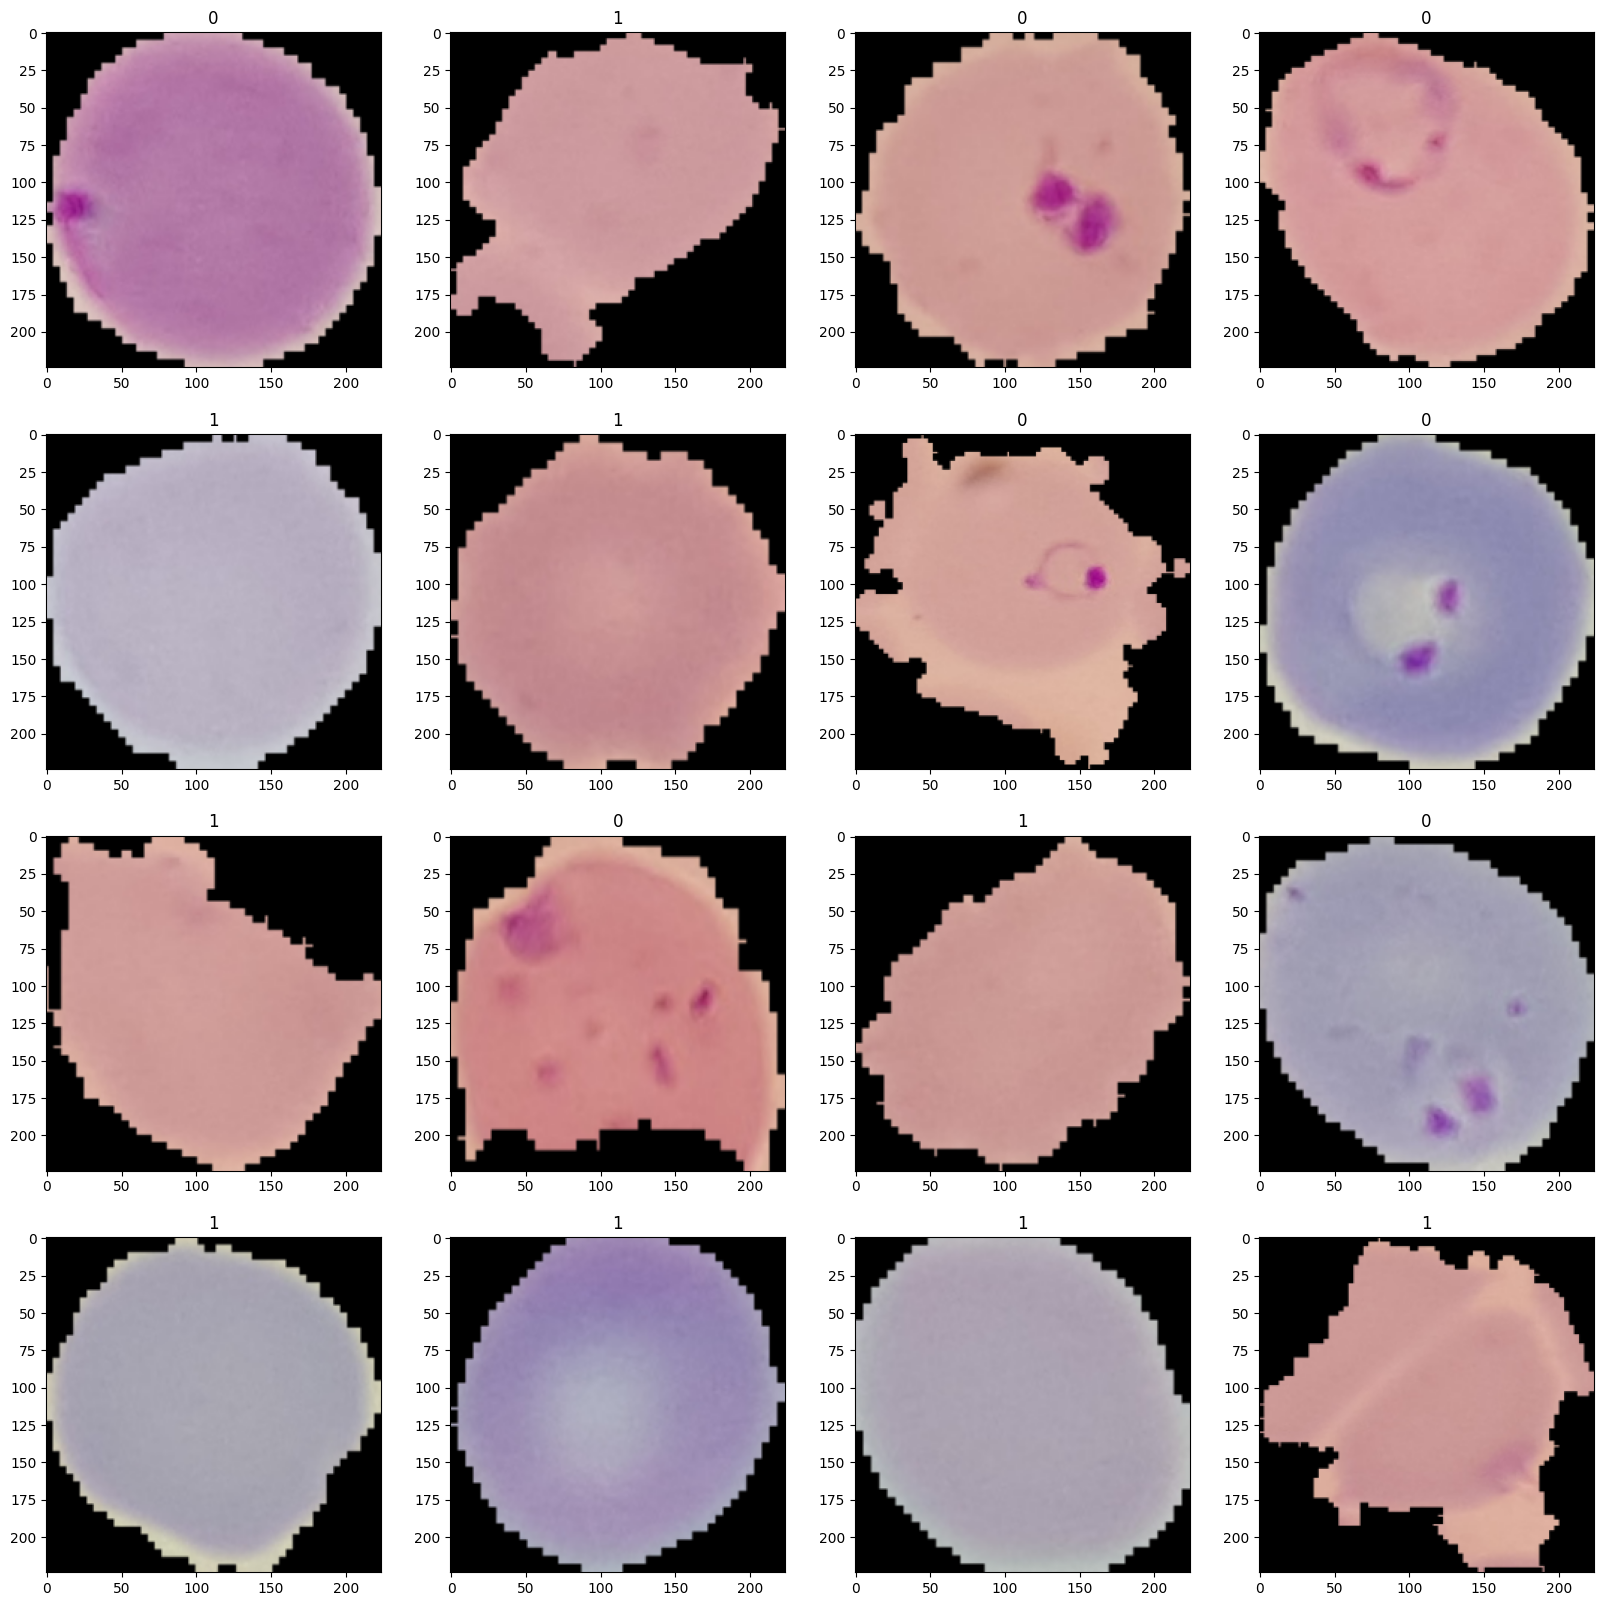

In [22]:
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))

for row in range(4):
    for col in range(4):
        indx = row * 4 + col  # Calculate the index for the current subplot
        image = batch[0][indx]

        ax[row, col].imshow(image.astype('int'))
        ax[row, col].title.set_text(batch[1][indx])

plt.show()

## Preprocessing Data

In [23]:
data = data.map(lambda x, y: (x/255, y))
scaled_data_iterator = data.as_numpy_iterator()
scaled_batch = scaled_data_iterator.next()

In [24]:
scaled_batch[0][0]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [25]:
scaled_batch[1]

array([0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0], dtype=int32)

In [26]:
tf.reduce_min(scaled_batch[0][0]), tf.reduce_max(scaled_batch[0][0])

(<tf.Tensor: shape=(), dtype=float32, numpy=0.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.91335785>)

## Split our data into training and testing part

In [27]:
len(data)

862

In [28]:
train_data_size = int(len(data) * 0.8)
test_data_size = int(len(data) * 0.2) + 1

train_data_size, test_data_size

(689, 173)

In [29]:
train_data = data.take(train_data_size)
test_data = data.skip(train_data_size).take(test_data_size)

In [30]:
train_data

<_TakeDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [31]:
len(train_data)

689

## Setting up Callbacks

In [32]:
def model_checkpoint_callback(checkpoint_file_path):
  # Creating a Model CheckPoint callback to save the model's weigth only per epoch
  callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_file_path,
                                                monitor = 'val_accuracy',
                                                save_weights_only = True,
                                                save_best_only = True,
                                                save_freq = 'epoch', # save per epoch
                                                verbose = 1)

  return callback

In [33]:
import datetime
def create_tensorboard_callback(dir_name, experiment_name):
  """
  Creates a TensorBoard callback instand to store log files.

  Stores log files with the filepath:
    "dir_name/experiment_name/current_datetime/"

  Args:
    dir_name: target directory to store TensorBoard log files
    experiment_name: name of experiment directory (e.g. efficientnet_model_1)
  """
  log_dir = dir_name + '/' + experiment_name + '/' + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir = log_dir
  )

  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

## Model Building

In [34]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Model, Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout

###**Inception V3 model**

In [35]:
from tensorflow.keras.applications import InceptionV3
inceptionv3_convbase = InceptionV3(weights = 'imagenet', include_top=False, input_shape=(224, 224, 3))

87910968/87910968 [==============================] - 0s 0us/step


In [36]:
for layer in inceptionv3_convbase.layers:
  layer.trainable = False # Freezing all the layers

In [37]:
input_layer = tf.keras.layers.Input(shape = (224, 224, 3))
x = inceptionv3_convbase(input_layer, training = False)
x = Flatten()(x)
x = Dense(256, activation = 'relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation = 'relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
output = Dense(1, activation = 'sigmoid')(x)

inceptionv3_model = Model(input_layer, output)

In [38]:
inceptionv3_model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = 'Adam',
    metrics = ['accuracy']
)

In [39]:
inceptionv3_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten (Flatten)           (None, 51200)             0         
                                                                 
 dense (Dense)               (None, 256)               13107456  
                                                                 
 batch_normalization_94 (Ba  (None, 256)               1024      
 tchNormalization)                                               
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                             

In [40]:
history_inceptionv3 = inceptionv3_model.fit(
    train_data,
    epochs = 15,
    batch_size = 32,
    validation_data = test_data,
    callbacks = [create_tensorboard_callback(dir_name = 'Malaria_Cell_Image_Detection',
                                             experiment_name = 'inceptionV3')]
)

Saving TensorBoard log files to: Malaria_Cell_Image_Detection/inceptionV3/20231028-033002
Epoch 1/15
689/689 [==============================] - 131s 156ms/step - loss: 0.2307 - accuracy: 0.9115 - val_loss: 0.1893 - val_accuracy: 0.9314
Epoch 2/15
689/689 [==============================] - 112s 163ms/step - loss: 0.1642 - accuracy: 0.9403 - val_loss: 0.2199 - val_accuracy: 0.9134
Epoch 3/15
689/689 [==============================] - 104s 151ms/step - loss: 0.1482 - accuracy: 0.9434 - val_loss: 0.1690 - val_accuracy: 0.9374
Epoch 4/15
689/689 [==============================] - 115s 167ms/step - loss: 0.1271 - accuracy: 0.9532 - val_loss: 0.1621 - val_accuracy: 0.9401
Epoch 5/15
689/689 [==============================] - 92s 133ms/step - loss: 0.1113 - accuracy: 0.9591 - val_loss: 0.1809 - val_accuracy: 0.9407
Epoch 6/15
689/689 [==============================] - 93s 134ms/step - loss: 0.1088 - accuracy: 0.9580 - val_loss: 0.1771 - val_accuracy: 0.9377
Epoch 7/15
689/689 [================

##**Inception ResNet V2 model**

In [43]:
from tensorflow.keras.applications import InceptionResNetV2
inception_resnet_convbase = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

219055592/219055592 [==============================] - 1s 0us/step


In [44]:
for layer in inception_resnet_convbase.layers:
  layer.trainable = False # Freezing all the layers

In [47]:
input_layer = tf.keras.layers.Input(shape=(224, 224, 3))
x = inception_resnet_convbase(input_layer, training=False)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
output = Dense(1, activation='sigmoid')(x)

inception_resnet_model = Model(input_layer, output)

In [48]:
inception_resnet_model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [49]:
inception_resnet_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 inception_resnet_v2 (Funct  (None, 5, 5, 1536)        54336736  
 ional)                                                          
                                                                 
 flatten_1 (Flatten)         (None, 38400)             0         
                                                                 
 dense_3 (Dense)             (None, 256)               9830656   
                                                                 
 batch_normalization_299 (B  (None, 256)               1024      
 atchNormalization)                                              
                                                                 
 dropout_2 (Dropout)         (None, 256)               0   

In [50]:
history_inception_resnet = inception_resnet_model.fit(
    train_data,
    epochs=15,
    batch_size=32,
    validation_data=test_data,
    callbacks=[create_tensorboard_callback(dir_name='Malaria_Cell_Images_Detection',
                                           experiment_name='InceptionResNetV2')]
)

Saving TensorBoard log files to: Malaria_Cell_Images_Detection/InceptionResNetV2/20231028-035918
Epoch 1/15
689/689 [==============================] - 193s 257ms/step - loss: 0.2118 - accuracy: 0.9199 - val_loss: 0.1579 - val_accuracy: 0.9430
Epoch 2/15
689/689 [==============================] - 178s 258ms/step - loss: 0.1553 - accuracy: 0.9433 - val_loss: 0.1489 - val_accuracy: 0.9450
Epoch 3/15
689/689 [==============================] - 177s 257ms/step - loss: 0.1327 - accuracy: 0.9529 - val_loss: 0.1510 - val_accuracy: 0.9445
Epoch 4/15
689/689 [==============================] - 208s 301ms/step - loss: 0.1197 - accuracy: 0.9565 - val_loss: 0.1724 - val_accuracy: 0.9372
Epoch 5/15
689/689 [==============================] - 176s 255ms/step - loss: 0.1120 - accuracy: 0.9602 - val_loss: 0.1586 - val_accuracy: 0.9425
Epoch 6/15
689/689 [==============================] - 208s 301ms/step - loss: 0.1046 - accuracy: 0.9611 - val_loss: 0.1538 - val_accuracy: 0.9445
Epoch 7/15
689/689 [=======

##**ResNet152 V2**

In [51]:
from tensorflow.keras.applications import ResNet152V2
resnet152v2_convbase = ResNet152V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

234545216/234545216 [==============================] - 1s 0us/step


In [52]:
for layer in resnet152v2_convbase.layers:
  layer.trainable = False # Freezing all the layers

In [53]:
input_layer = tf.keras.layers.Input(shape=(224, 224, 3))
x = resnet152v2_convbase(input_layer, training=False)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)
output = Dense(1, activation='sigmoid')(x)

resnet152v2_model = Model(input_layer, output)

In [54]:
resnet152v2_model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [55]:
resnet152v2_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet152v2 (Functional)    (None, 7, 7, 2048)        58331648  
                                                                 
 flatten_2 (Flatten)         (None, 100352)            0         
                                                                 
 dense_6 (Dense)             (None, 256)               25690368  
                                                                 
 batch_normalization_301 (B  (None, 256)               1024      
 atchNormalization)                                              
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                           

In [56]:
history_resnet152 = resnet152v2_model.fit(
    train_data,
    epochs=10,
    batch_size=32,
    validation_data=test_data,
    callbacks=[create_tensorboard_callback(dir_name='Malaria_Cell_Images_Detection',
                                           experiment_name='ResNet152V2'),
               model_checkpoint_callback('Malaria-Cell-Images-Detection/ResNet152V2/checkpoint.ckpt')]
)

Saving TensorBoard log files to: Malaria_Cell_Images_Detection/ResNet152V2/20231028-044659
Epoch 1/10
689/689 [==============================] - ETA: 0s - loss: 0.2036 - accuracy: 0.9236
Epoch 1: val_accuracy improved from -inf to 0.94755, saving model to Malaria-Cell-Images-Detection/ResNet152V2/checkpoint.ckpt
689/689 [==============================] - 249s 344ms/step - loss: 0.2036 - accuracy: 0.9236 - val_loss: 0.1433 - val_accuracy: 0.9475
Epoch 2/10
689/689 [==============================] - ETA: 0s - loss: 0.1272 - accuracy: 0.9541
Epoch 2: val_accuracy improved from 0.94755 to 0.95100, saving model to Malaria-Cell-Images-Detection/ResNet152V2/checkpoint.ckpt
689/689 [==============================] - 235s 341ms/step - loss: 0.1272 - accuracy: 0.9541 - val_loss: 0.1371 - val_accuracy: 0.9510
Epoch 3/10
689/689 [==============================] - ETA: 0s - loss: 0.1027 - accuracy: 0.9639
Epoch 3: val_accuracy did not improve from 0.95100
689/689 [==============================] - 

## Model Evaluating

In [57]:
# Inception V3 results
results_inceptionv3 = inceptionv3_model.evaluate(test_data)
results_inceptionv3

173/173 [==============================] - 33s 74ms/step - loss: 0.2197 - accuracy: 0.9436


[0.21967463195323944, 0.9435571432113647]

<Axes: >

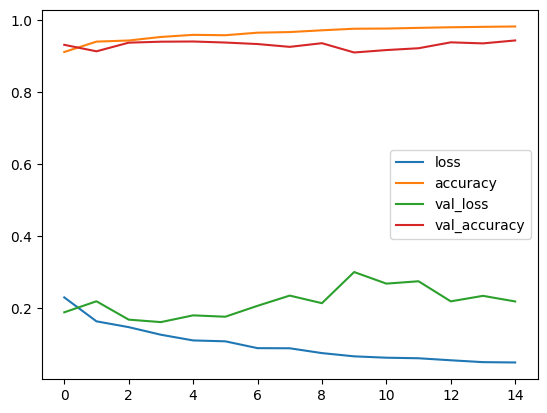

In [58]:
pd.DataFrame(history_inceptionv3.history).plot()

In [59]:
# Inception ResNet V2
results_inception_resnet = inception_resnet_model.evaluate(test_data)
results_inception_resnet

173/173 [==============================] - 62s 185ms/step - loss: 0.2409 - accuracy: 0.9385


[0.24090425670146942, 0.938475489616394]

<Axes: >

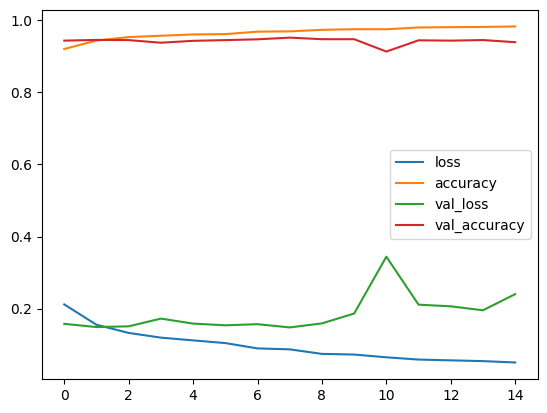

In [60]:
pd.DataFrame(history_inception_resnet.history).plot()

In [63]:
# Inception ResNet V2
results_resnet152v2 = resnet152v2_model.evaluate(test_data)
results_resnet152v2

173/173 [==============================] - 66s 247ms/step - loss: 0.2140 - accuracy: 0.9512


[0.21395380795001984, 0.9511796832084656]

<Axes: >

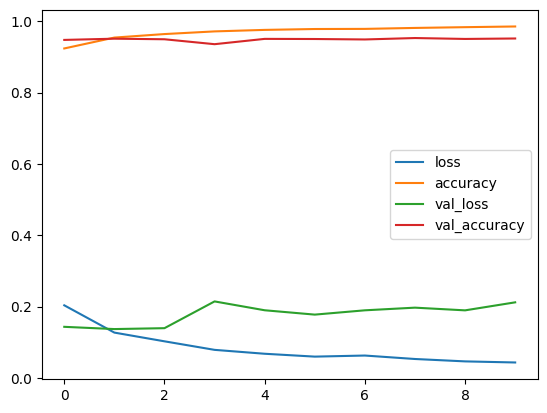

In [64]:
pd.DataFrame(history_resnet152.history).plot()

## Viewing our results with TensorBoard

In [65]:
# Upload experiment results to TensorBoard (uncomment to run)
!tensorboard dev upload --logdir ./Malaria_Cell_Images_Detection\
  --name "Malaria Cell Image Detection" \
  --description "Deep CNN Transfer Learning model for classifying into Infected or Healthy Cell" \
  --one_shot

2023-10-28 05:32:26.780910: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-28 05:32:26.780969: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-28 05:32:26.781012: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-28 05:32:27.941651: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./Malaria_Cell_Images_Detection

This TensorBoard will be visible to everyone. Do not upload sensitive
da

## Setting up a function to make predictions on custom images

In [91]:
class_names = ['Malaria Infected Cell', 'Healthy Cell']
def single_predictions(img_path, img_size=224):
  img = tf.io.read_file(img_path)
  decoded_img = tf.io.decode_image(img)
  resized_img = tf.image.resize(decoded_img, [img_size, img_size])
  input_tensor = tf.cast(resized_img/255. , dtype=tf.float32)
  y_pred1 = inception_resnet_model.predict(tf.expand_dims(input_tensor, axis=0))
  if tf.round(y_pred1) == 1:
    y_prob1 = y_pred1
  else:
    y_prob1 = 1.0 - y_pred1[0][0]

  plt.subplot(1, 2, 1)
  plt.imshow(input_tensor)
  plt.title(f'Inception ResNet V2 \n {class_names[int(tf.round(tf.squeeze(y_pred1)))]} \n Probability : {y_prob1}')

  y_pred2 = resnet152v2_model.predict(tf.expand_dims(input_tensor, axis=0))
  if tf.round(y_pred2) == 1:
    y_prob2 = y_pred2
  else:
    y_prob2 = 1.0 - y_pred2[0][0]

  plt.subplot(1, 2, 2)
  plt.imshow(input_tensor)
  plt.title(f'ResNet152V2 Model \n {class_names[int(tf.round(tf.squeeze(y_pred2)))]} \n Probability : {y_prob2}')

1/1 [==============================] - 0s 35ms/step


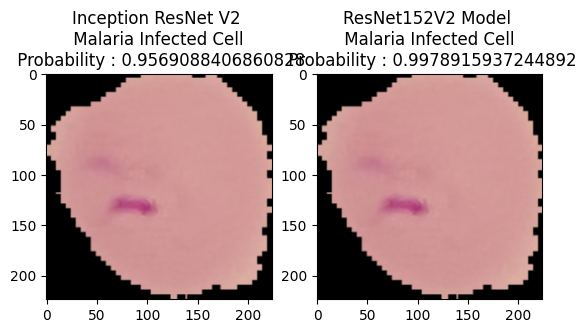

In [92]:
single_predictions('/content/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144348_cell_140.png')

1/1 [==============================] - 0s 33ms/step


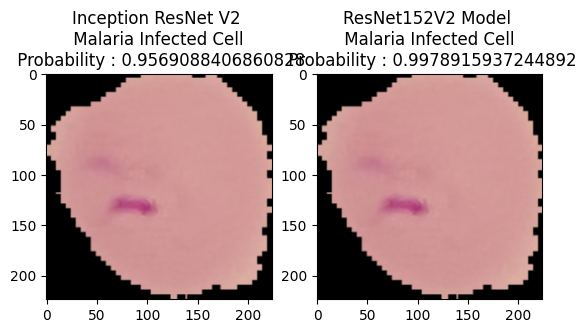

In [93]:
single_predictions('/content/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144348_cell_140.png')

1/1 [==============================] - 0s 33ms/step


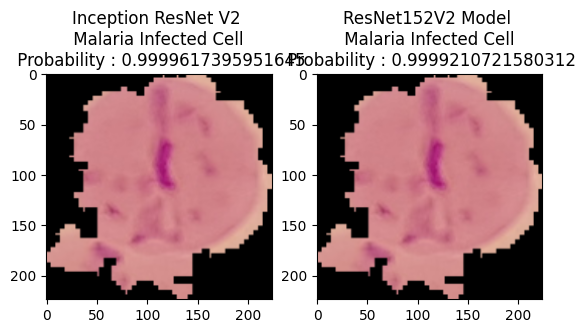

In [94]:
single_predictions('/content/cell_images/Parasitized/C101P62ThinF_IMG_20150918_151149_cell_81.png')

1/1 [==============================] - 0s 40ms/step


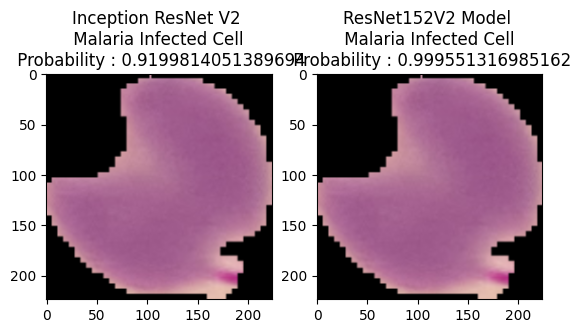

In [95]:
single_predictions('/content/cell_images/Parasitized/C116P77ThinF_IMG_20150930_171448_cell_108.png')

1/1 [==============================] - 0s 35ms/step


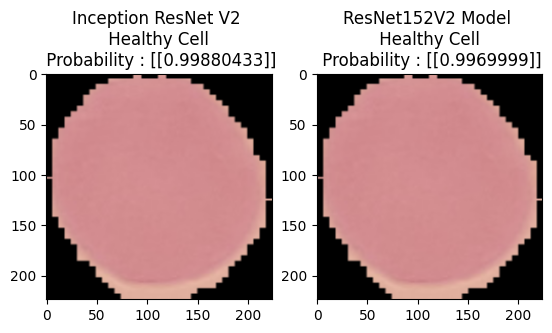

In [96]:
single_predictions('/content/cell_images/Uninfected/C112P73ThinF_IMG_20150930_131753_cell_60.png')

1/1 [==============================] - 0s 148ms/step


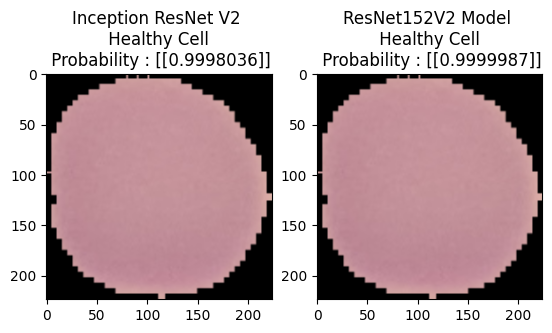

In [97]:
single_predictions('/content/cell_images/Uninfected/C114P75ThinF_IMG_20150930_150733_cell_62.png')

1/1 [==============================] - 0s 67ms/step


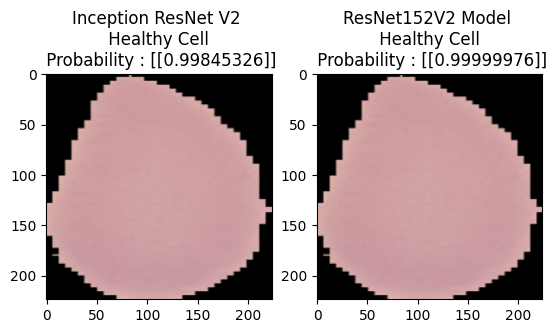

In [98]:
single_predictions('/content/cell_images/Uninfected/C114P75ThinF_IMG_20150930_150555_cell_127.png')

In [99]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Saving our Model

In [100]:
resnet152v2_model.save('/content/drive/MyDrive/resnet152_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [101]:
inception_resnet_model.save('/content/drive/MyDrive/inception_resnet_model.h5')